# Use the Scatterwidget with AnnData from Notebook

This tutorial is an example of how to use the Napari-Spatialdata ScatterWidget from a notebook.

## Import packages and data

There are two options to install napari-spatialdata:

(1) Run `pip install napari-spatialdata`

or, 

(2) Clone this [repo](https://github.com/scverse/napari-spatialdata) and run `pip install -e .`

In [3]:
from napari_spatialdata import QtAdataScatterWidget
import squidpy as sq
import matplotlib.pyplot as plt

Load in the AnnData:

In [4]:
adata = sq.datasets.visium_hne_adata()

The following line is needed to initialize a widget without a QApplication:

In [5]:
%gui qt5

Open the ScatterWidget:

In [ ]:
widget = QtAdataScatterWidget(adata = adata)
widget.show()

2024-08-27 11:27:33.166 | DEBUG    | napari_spatialdata._scatterwidgets:_onClick:635 - Plotting has been requested.
2024-08-27 11:27:33.167 | DEBUG    | napari_spatialdata._scatterwidgets:_onClick:668 - Change in color label detected.
2024-08-27 11:27:33.168 | DEBUG    | napari_spatialdata._scatterwidgets:_onClick:717 - A change in x or y data has been detected.
2024-08-27 11:27:33.168 | DEBUG    | napari_spatialdata._scatterwidgets:plot:750 - Generating scatter plot...
2024-08-27 11:27:33.289 | DEBUG    | napari_spatialdata._scatterwidgets:update_proximity_sensitivity:460 - Updating proximity sensitivity...
2024-08-27 11:27:34.991 | DEBUG    | napari_spatialdata._scatterwidgets:mouseReleaseEvent:988 - Mouse release event detected at PyQt5.QtCore.QPointF(5.232254838429812, 4.25023425095954)
2024-08-27 11:27:35.027 | DEBUG    | napari_spatialdata._scatterwidgets:update_proximity_sensitivity:460 - Updating proximity sensitivity...
2024-08-27 11:27:36.979 | DEBUG    | napari_spatialdata._

In [8]:
plt.rcParams['figure.facecolor'] = 'black'

(-0.5, 1087.5, 899.5, -0.5)

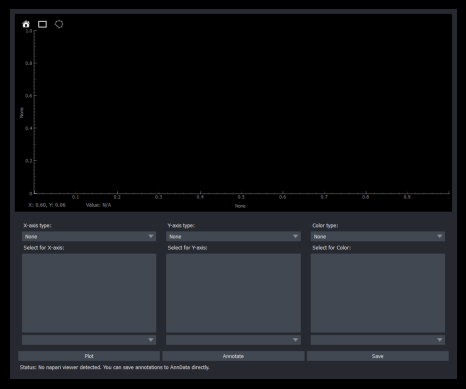

In [11]:
plt.imshow(widget.screenshot())
plt.axis('off')

The widget opens without any selections. You can now pick specific x-axis, y-axis, and color values to visualize in the scatterplot. Click the "Plot" button to generate the scatterplot. 

Below, you can see an example where UMAP coordinates (from obsm) are used for the spatial coordinates and 'total_count_mt' (from 'obs') is used to color the points. Note that the widget to control colors changes depending on whether you choose continuous or discrete values.

(-0.5, 1087.5, 899.5, -0.5)

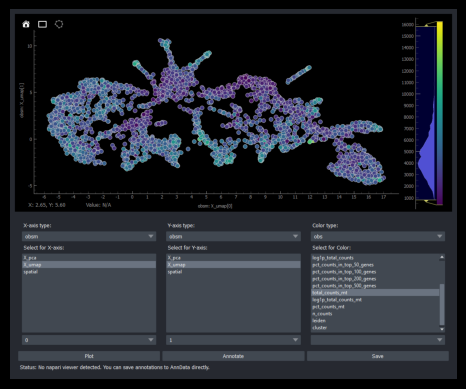

In [13]:
plt.imshow(widget.screenshot())
plt.axis('off')

The distribution of the color values ('total_count_mt') has a long tail, so you may choose to change how the values correspond to the color by using the slider on the histogram.

(-0.5, 1087.5, 899.5, -0.5)

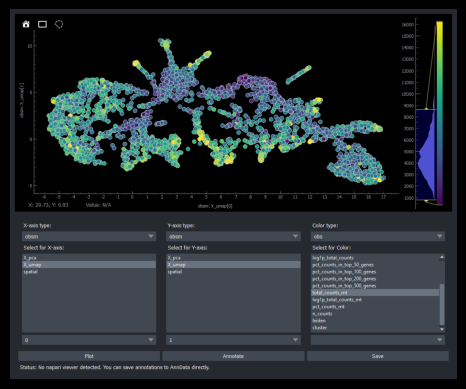

In [16]:
plt.imshow(widget.screenshot())
plt.axis('off')

It is also possible to change the LUT (look up table) used for the visualization. Right click on the color bar to choose a new LUT. The screenshot below shows the 'inferno' LUT (from the set 'local').

(-0.5, 1087.5, 899.5, -0.5)

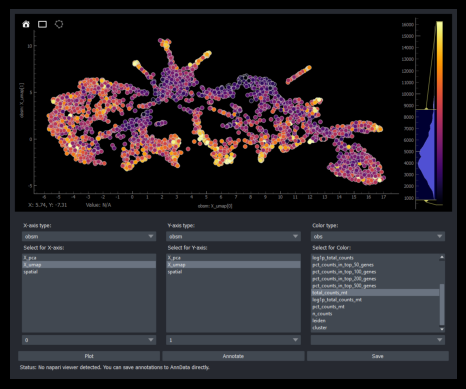

In [18]:
plt.imshow(widget.screenshot())
plt.axis('off')

The widget has several options to change how the data a visualized. 

For example, use the right mouse button on the plot area to access "Plot Options," where you can change the transparency of the points and add a grid. Some options may require you to click the "Plot" button for the changes to take effect.

(-0.5, 1087.5, 899.5, -0.5)

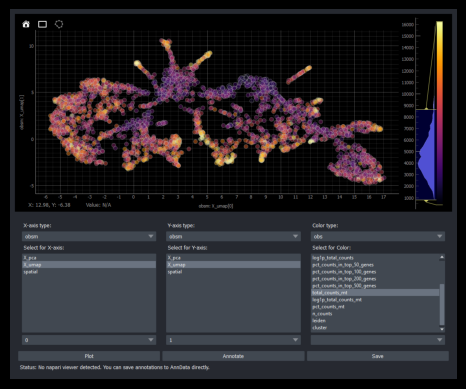

In [20]:
plt.imshow(widget.screenshot())
plt.axis('off')

If you choose to visualize discrete data (ex. 'cluster' from ob), a new control widget will be created. 

(-0.5, 1087.5, 899.5, -0.5)

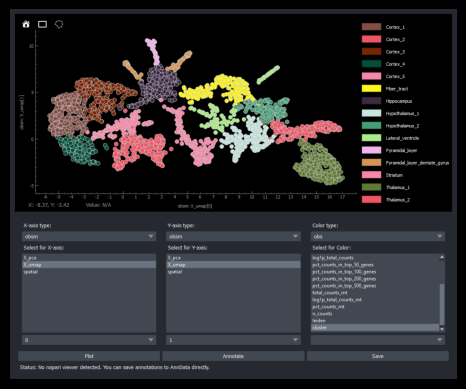

In [23]:
plt.imshow(widget.screenshot())
plt.axis('off')

The color of each label can be changed separately. Just left-click on the color patch to open the color picker.

In the example below, the color of the bottom right cluster ('Thalamus_1') was changed to blue.

(-0.5, 1087.5, 899.5, -0.5)

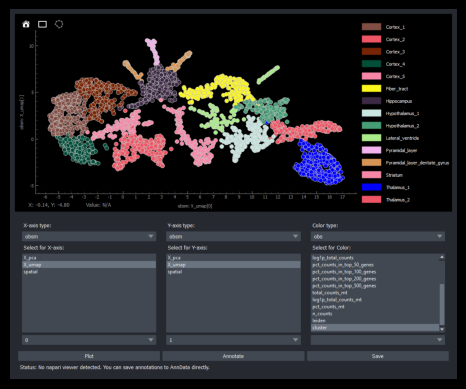

In [27]:
plt.imshow(widget.screenshot())
plt.axis('off')

If you get lost during your explorations, clicking the house icon will restore the original settings of the discrete color widget, reset the default contrast of the continuous color widget, and pan the data to the original view.

### Pseudoscatter

If you don't provide a selection for one of the axes, the points will arrange themselves in the form of a pseudohistogram. 
 
You can use this option to gain insight into one-dimensional distributions of your data. In the example below x-axis (None), y-axis (obs,cluster), color (obs, cluster).

You may need to wait a moment for this process to finish for very large data sets.

(-0.5, 873.5, 893.5, -0.5)

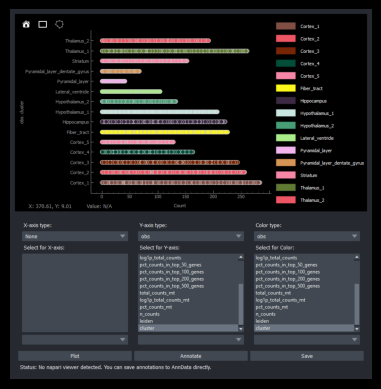

In [8]:
plt.imshow(widget.screenshot())
plt.axis('off')